In [1]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(2020)

N = 100
D = 2

X = np.random.randn(N, D)*2

# The center of the group A is (-2, -2)
X[:N//2, :] = X[:N//2, :] - 2*np.ones((N//2, D))
# The center of the group B is (2, 2)
X[N//2:, :] = X[N//2:, :] + 2*np.ones((N//2, D))
#  group A : 0
#  group B : 1
T = np.array([0]*(N//2) + [1]*(N//2)).reshape(100, 1)

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(T))

In [3]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [5]:
model = Model()
criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [7]:
for epoch in range(1000):
    y_pred = model(x_data)
    
    loss = criterion(y_pred, y_data)
    
    if (epoch < 10):
        print(epoch, ' : ', loss.data.item())
    elif(989 < epoch):
        print(epoch, ' : ', loss.data.item())
    
    # Set the zero gradient, and calculate the weight.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0  :  0.18669039011001587
1  :  0.1866801679134369
2  :  0.1866699755191803
3  :  0.18665987253189087
4  :  0.18664981424808502
5  :  0.1866396963596344
6  :  0.18662957847118378
7  :  0.1866195648908615
8  :  0.18660952150821686
9  :  0.1865995228290558
990  :  0.1821126788854599
991  :  0.18211066722869873
992  :  0.18210874497890472
993  :  0.1821068376302719
994  :  0.18210487067699432
995  :  0.1821029633283615
996  :  0.18210098147392273
997  :  0.1820990890264511
998  :  0.1820971667766571
999  :  0.18209519982337952


In [8]:
for f in model.parameters():
    print('============================')
    print('Data : ', f.data)
    print('Grad : ', f.grad)

Data :  tensor([[0.9271, 1.1032]])
Grad :  tensor([[-0.0057, -0.0064]])
Data :  tensor([0.0197])
Grad :  tensor([0.0110])


In [9]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

In [10]:
print(' === Final Gradient Descend === ')
print(w)

 === Final Gradient Descend === 
[Parameter containing:
tensor([[0.9271, 1.1032]], requires_grad=True), Parameter containing:
tensor([0.0197], requires_grad=True)]


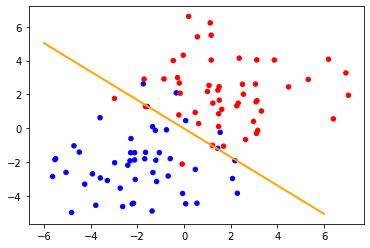

In [11]:
# Group A and Group B are drawn
plt.scatter(X[:, 0], X[:, 1], c=T.reshape(N), s=20, cmap='bwr')

x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]

# Drawing a border
line_up = plt.plot(x_axis, y_axis, 'r-', color='orange', linewidth=2)
plt.show()